#Análise de inadimplência

##Verificação da base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
#Importação dos dados
data = pd.read_csv('treino.csv')
data.shape

(110000, 11)

In [3]:
data.head(5)

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

In [5]:
#Verificação dos tipos dos dados
data.dtypes

inadimplente                               int64
util_linhas_inseguras                    float64
idade                                      int64
vezes_passou_de_30_59_dias                 int64
razao_debito                             float64
salario_mensal                           float64
numero_linhas_crdto_aberto                 int64
numero_vezes_passou_90_dias                int64
numero_emprestimos_imobiliarios            int64
numero_de_vezes_que_passou_60_89_dias      int64
numero_de_dependentes                    float64
dtype: object

In [6]:
#Verificar se há dados faltantes
for col in data.columns:
  print(col, data[col].isnull().sum())

inadimplente 0
util_linhas_inseguras 0
idade 0
vezes_passou_de_30_59_dias 0
razao_debito 0
salario_mensal 21763
numero_linhas_crdto_aberto 0
numero_vezes_passou_90_dias 0
numero_emprestimos_imobiliarios 0
numero_de_vezes_que_passou_60_89_dias 0
numero_de_dependentes 2878


In [7]:
21763/110000

0.19784545454545455

In [8]:
2878/110000

0.026163636363636365

A porcentagem de dados faltantes na coluna numero_de_dependentes representa aproximadamente 3% das observações. Como mais de 50% das observações tem Zero dependentes, usaremos a mediana para substituir os valores ausentes.

A porcentagem de dados faltantes na coluna salario_mensal representa aproximadamente 20% das observações.
Há 3 possibilidades:
1-Excluir as observações com dados faltantes (nesse caso, a base ficaria com aproximadamento 88mil observações, que ainda é um número alto);
2-Excluir a coluna salario_mensal (para isso precisamos verificar a importância que ela teria para explicar a inadimplência);
3-Preencher os dados faltante com a mediana dos salários, baseado na sua distribuição. Testaremos as 3 a seguir.



In [9]:
data.salario_mensal.describe()

count    8.823700e+04
mean     6.637411e+03
std      1.338395e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.225000e+03
max      3.008750e+06
Name: salario_mensal, dtype: float64

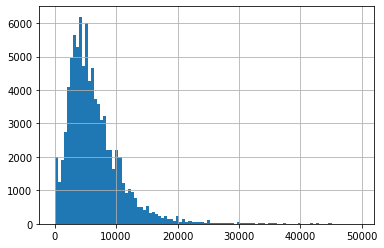

In [10]:
data[data.salario_mensal<50000]['salario_mensal'].hist(bins=100)

In [11]:
data.numero_de_dependentes.describe()

count    107122.000000
mean          0.757482
std           1.114670
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: numero_de_dependentes, dtype: float64

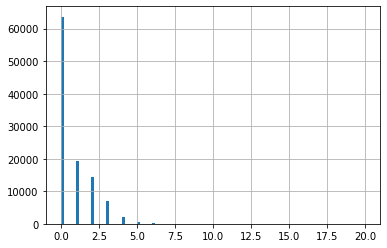

In [12]:
data.numero_de_dependentes.hist(bins=100)

In [13]:
data.numero_de_dependentes = data.numero_de_dependentes.fillna(
                                    data.numero_de_dependentes.median())

##Análise 1: Exclusão de observações com dados faltantes da coluna salario_mensal

###Verificação dos dados

In [14]:
#Excluir dados faltantes
data1 = data.copy().dropna()
data1.shape

(88237, 11)

In [15]:
#Verificar se há dados faltantes
for col in data1.columns:
  print(col, data1[col].isnull().sum())

inadimplente 0
util_linhas_inseguras 0
idade 0
vezes_passou_de_30_59_dias 0
razao_debito 0
salario_mensal 0
numero_linhas_crdto_aberto 0
numero_vezes_passou_90_dias 0
numero_emprestimos_imobiliarios 0
numero_de_vezes_que_passou_60_89_dias 0
numero_de_dependentes 0


In [16]:
#Verificar se a base é balanceada
data1.inadimplente.value_counts()

0    82153
1     6084
Name: inadimplente, dtype: int64

In [17]:
data1.inadimplente.value_counts()[1]/data1.shape[0]

0.06895066695377222

A base não é balanceada, pois a quantidade de observações inadimplentes representam apenas 7% do total, aproximadamente. Será preciso balancear a base para construir um modelo de predição.

###Verificação dos dados por coluna

In [18]:
#Verificar os resumos das variáveis
for i in data1.columns:
  print(data1[i].describe())

count    88237.000000
mean         0.068951
std          0.253372
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: inadimplente, dtype: float64
count    88237.000000
mean         5.855376
std        260.699437
min          0.000000
25%          0.035312
50%          0.178883
75%          0.582609
max      50708.000000
Name: util_linhas_inseguras, dtype: float64
count    88237.000000
mean        51.248320
std         14.413576
min          0.000000
25%         40.000000
50%         51.000000
75%         61.000000
max        103.000000
Name: idade, dtype: float64
count    88237.000000
mean         0.387491
std          3.596258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: vezes_passou_de_30_59_dias, dtype: float64
count    88237.000000
mean        26.827167
std        389.682244
min          0.000000
25%          0.143494
50%          0.296660
75%     

Pelo resumo, é possível perceber que existem muitos outliers, que deverão ser analisados. Mas, principalmente, vemos que, na coluna idade, temos um valor igual a zero. Nesse caso, já iremos excluir essa observação.

In [19]:
data1[data1.idade < 18].count()[0]

1

In [20]:
data1[data1.idade < 18]

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [21]:
data1.drop(index = 65695, inplace = True)

In [22]:
data1.shape

(88236, 11)

In [23]:
#Separar df apenas com inadimplentes, para verificação da base
inad1 = data1[data1.inadimplente == 1]
inad1.shape

(6084, 11)

####Gráficos

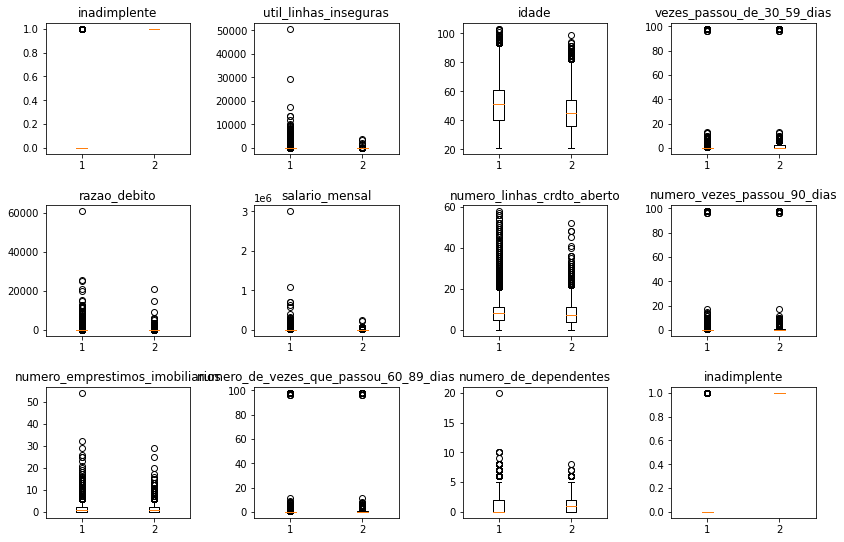

In [24]:
#Boxplots
fig, axs = plt.subplots(3,4,figsize= (12,8))
fig.tight_layout(pad=3.0)
colunas = list(data1.columns)
colunas.append('inadimplente')
for i in range(3):
  for j in range(4):
    axs[i][j].boxplot(x = [data1[colunas[i*4+j]], inad1[colunas[i*4+j]]])
    axs[i][j].set_title(colunas[i*4+j])

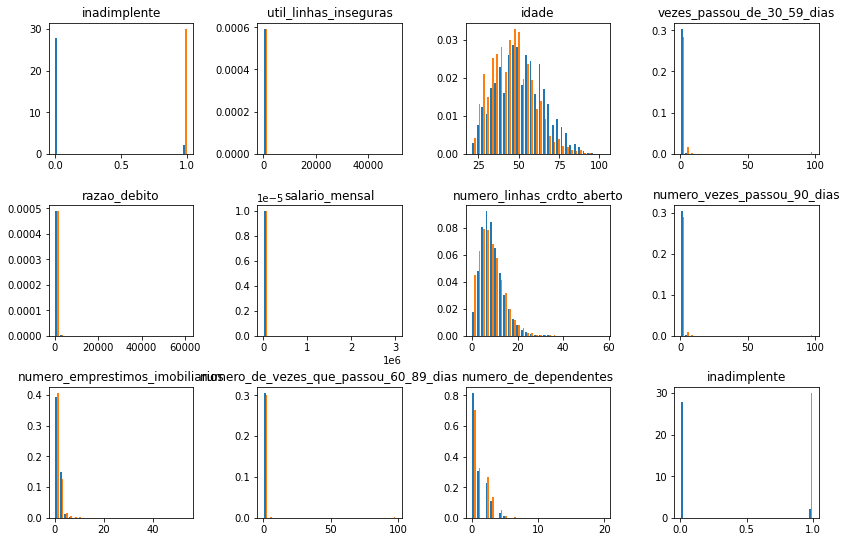

In [25]:
#Histogramas
fig, axs = plt.subplots(3,4,figsize= (12,8))
fig.tight_layout(pad=3.0)
colunas = list(data1.columns)
colunas.append('inadimplente')
for i in range(3):
  for j in range(4):
    axs[i][j].hist(x = [data1[colunas[i*4+j]], inad1[colunas[i*4+j]]], 
                            bins = 30, density=True)
    axs[i][j].set_title(colunas[i*4+j])

Pelos boxplots e histogramas, percebemos, que as distribuições das variáveis, considerando as observações inadimplentes são bastante similares às distribuições considerando o total das observações, inclusive na proporção de outliers, portanto não excluiremos mais nada.

###Correlação

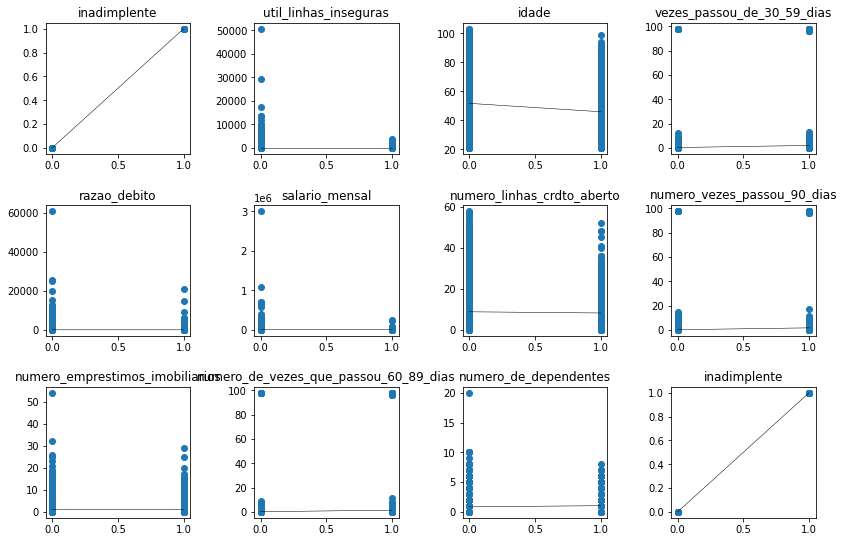

In [26]:
#Dispersão
fig, axs = plt.subplots(3,4,figsize= (12,8))
fig.tight_layout(pad=3.0)
colunas = list(data1.columns)
colunas.append('inadimplente')
for i in range(3):
  for j in range(4):
    axs[i][j].scatter(data1['inadimplente'],data1[colunas[i*4+j]])
    b, a = np.polyfit(data1['inadimplente'],data1[colunas[i*4+j]], deg=1)
    xseq = np.linspace(0, 1, num=100)
    axs[i][j].plot(xseq, a + b * xseq, color="k", lw=0.5);
    axs[i][j].set_title(colunas[i*4+j])

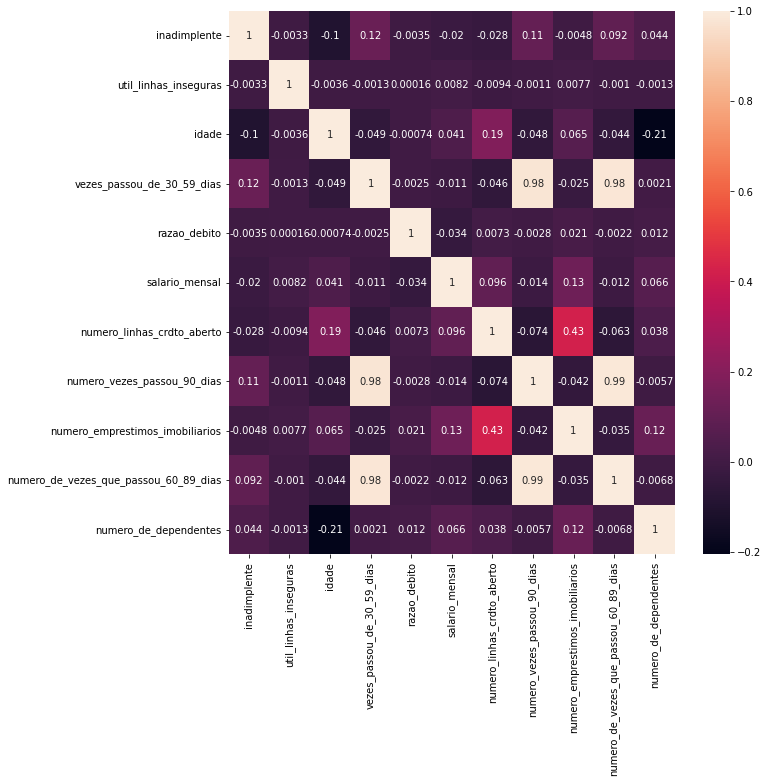

In [27]:
#Correlação  
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True)
plt.show()

###Modelo

####Balaceamento das observações: Reduzir as observações de adimplentes de forma aleatória

In [28]:
data1.inadimplente.value_counts()

0    82152
1     6084
Name: inadimplente, dtype: int64

In [29]:
#Reduzir as observações de adimplentes de forma aleatória
df1_class_0 = data1[data1['inadimplente'] == 0]
df1_class_1 = data1[data1['inadimplente'] == 1]
df1_class_0_under = df1_class_0.sample(6084)
df1_test_under = pd.concat([df1_class_0_under, df1_class_1], axis=0)

In [30]:
df1_test_under.shape

(12168, 11)

###Normalização dos dados

In [31]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
dtnorm1 = norm.fit_transform(df1_test_under)
datanorm1 = pd.DataFrame(dtnorm1, columns = df1_test_under.columns)

In [32]:
datanorm1.head(3)

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.0,0.000009,0.432099,0.0,1.414398e-05,0.036275,0.230769,0.0,0.034483,0.0,0.0
1,0.0,0.000002,0.604938,0.0,4.309150e-07,0.030256,0.153846,0.0,0.000000,0.0,0.0
2,0.0,0.000006,0.641975,0.0,1.055513e-05,0.077007,0.423077,0.0,0.068966,0.0,0.0


###Separação das variáveis explicativas e resposta

In [33]:
#Separação das variáveis explicativas e resposta
y1 = datanorm1['inadimplente']
x1 = datanorm1.drop(columns=['inadimplente'],axis=1)

In [34]:
len(y1)

12168

In [35]:
len(x1)

12168

###Verificação das variáveis que mais contribuem para explicar a inadimplência

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
scores1 = SelectKBest(score_func=f_classif, k="all")
a = scores1.fit_transform(x1,y1)

In [37]:
sco1 = pd.DataFrame(columns = ['var', 'score', 'porcentagem'], index=range(10))
for i in range(10):
  sco1.iloc[i] = [scores1.feature_names_in_[i],scores1.scores_[i], 
                  (scores1.scores_[i]/sum(scores1.scores_))*100]
sco1.sort_values(by = 'score', ascending = False)


,var,score,porcentagem
1,idade,539.223797,47.667001
2,vezes_passou_de_30_59_dias,162.930444,14.402936
6,numero_vezes_passou_90_dias,129.745793,11.469436
8,numero_de_vezes_que_passou_60_89_dias,92.401591,8.168235
9,numero_de_dependentes,89.631956,7.923401
4,salario_mensal,79.102006,6.992561
5,numero_linhas_crdto_aberto,35.479881,3.136396
0,util_linhas_inseguras,1.892215,0.16727
7,numero_emprestimos_imobiliarios,0.647823,0.057267
3,razao_debito,0.175287,0.015495


###Modelo

####Testes com RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)
from sklearn.model_selection import RandomizedSearchCV

####Testagem de hiperparâmetros do modelo1 com todas as variáveis

In [39]:
#Testagem de hiperparâmetros do modelo1 com todas as variáveis
min_samples_split = [2,3,4,5,7,9,11,13,15,17]
max_depth = [2,3,5,7,9,11,13,15,17]
min_samples_leaf = [2,3,4,5,7,9]
valores = {'min_samples_split':min_samples_split, 
           'max_depth':max_depth, 
           'min_samples_leaf':min_samples_leaf}

modelo1_todasvars = RandomForestClassifier(n_estimators=50, n_jobs=-1)

search = RandomizedSearchCV(estimator=modelo1_todasvars,
                            param_distributions=valores, 
                            cv=kfold, 
                            n_iter=50, 
                            n_jobs=-1)
search.fit(x1,y1)
print(search.best_score_, 
      search.best_estimator_.min_samples_split, 
      search.best_estimator_.max_depth, 
      search.best_estimator_.min_samples_leaf)

0.7735054261099691 11 13 5


####Testagem de hiperparâmetros do modelo excluindo as variáveis de menor score

In [40]:
x1_scores = x1[['idade', 'vezes_passou_de_30_59_dias',
               'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
               'numero_de_vezes_que_passou_60_89_dias', 
               'numero_de_dependentes']]

In [41]:
#Testagem de hiperparâmetros do modelo excluindo as variáveis de menor score
min_samples_split = [2,3,4,5,7,9,11,13,15,17]
max_depth = [2,3,5,7,9,11,13,15,17]
min_samples_leaf = [2,3,4,5,7,9]
valores = {'min_samples_split':min_samples_split, 
           'max_depth':max_depth, 
           'min_samples_leaf':min_samples_leaf}

modelo1_scores = RandomForestClassifier(n_estimators=50, 
                                        n_jobs=-1)

search = RandomizedSearchCV(estimator=modelo1_scores,
                            param_distributions=valores, 
                            cv=kfold,
                            n_iter=50,
                            n_jobs=-1)
search.fit(x1_scores,y1)
print(search.best_score_, 
      search.best_estimator_.min_samples_split, 
      search.best_estimator_.max_depth, 
      search.best_estimator_.min_samples_leaf)

0.7479449408485961 3 9 3


####Testagem de hiperparâmetros do modelo excluindo as variáveis de correlação alta

In [42]:
x1_semcorr = x1[['util_linhas_inseguras', 'idade', 
                 'vezes_passou_de_30_59_dias', 'razao_debito', 
                 'salario_mensal', 'numero_linhas_crdto_aberto',
                 'numero_emprestimos_imobiliarios', 'numero_de_dependentes']]

In [43]:
#Testagem de hiperparâmetros do modelo excluindo as variáveis de correlação alta
min_samples_split = [2,3,4,5,7,9,11,13,15,17]
max_depth = [2,3,5,7,9,11,13,15,17]
min_samples_leaf = [2,3,4,5,7,9]
valores = {'min_samples_split':min_samples_split, 
           'max_depth':max_depth, 
           'min_samples_leaf':min_samples_leaf}

modelo1_semcorr = RandomForestClassifier(n_estimators=50, 
                                         n_jobs=-1)

search = RandomizedSearchCV(estimator=modelo1_semcorr,
                            param_distributions=valores, 
                            cv=kfold, 
                            n_iter=50, 
                            n_jobs=-1)
search.fit(x1_semcorr,y1)
print(search.best_score_, 
      search.best_estimator_.min_samples_split, 
      search.best_estimator_.max_depth, 
      search.best_estimator_.min_samples_leaf)

0.7481939478432846 13 7 2


In [44]:
x1_5vars = x1[['idade', 'vezes_passou_de_30_59_dias', 'numero_de_dependentes',
                'numero_linhas_crdto_aberto', 'salario_mensal']]

####Testagem de hiperparâmetros do modelo excluindo as variaveis de correlação alta e de scores baixos

In [45]:
#Testagem de hiperparâmetros do modelo excluindo as variaveis de correlação alta
#e de scores baixos
min_samples_split = [2,3,4,5,7,9,11,13,15,17]
max_depth = [2,3,5,7,9,11,13,15,17]
min_samples_leaf = [2,3,4,5,7,9]
valores = {'min_samples_split':min_samples_split, 
           'max_depth':max_depth, 
           'min_samples_leaf':min_samples_leaf}

modelo1_5vars = RandomForestClassifier(n_estimators=50, 
                                       n_jobs=-1)

search = RandomizedSearchCV(estimator=modelo1_5vars,
                            param_distributions=valores, 
                            cv=kfold, 
                            n_iter=50, 
                            n_jobs=-1)
search.fit(x1_5vars,y1)
print(search.best_score_,
      search.best_estimator_.min_samples_split, 
      search.best_estimator_.max_depth, 
      search.best_estimator_.min_samples_leaf)

0.7085807276759133 13 9 5


Utilizando Random Forest, o melhor modelo neste caso foi o que utilizou todas as variáveis explicativas, atingindo a acurácia de 0.77350, com os parâmetros min_samples_split=11, max_depth=13 e min_samples_leaf=5.

####Testes com AdaBoost com DacisionTree

In [46]:
from sklearn.ensemble import AdaBoostClassifier

####Testagem de hiperparâmetros do modelo utilizando todas as variáveis

In [47]:
#Testagem de hiperparâmetros do modelo com AdaBoost
n_estimators = [150,300,400,500]
learning_rate = [0.05,0.1,0.2,0.3,0.5,0.7,0.9]
valores = {'n_estimators':n_estimators, 
           'learning_rate':learning_rate}

modelo1_ada = AdaBoostClassifier()

search = RandomizedSearchCV(estimator=modelo1_ada,
                            param_distributions=valores, 
                            cv=kfold, 
                            n_iter=min(len(n_estimators)*len(learning_rate),50),
                            n_jobs=-1)
search.fit(x1,y1)
print(search.best_score_, 
      search.best_estimator_.n_estimators, 
      search.best_estimator_.learning_rate)

0.7653680342294276 400 0.05


####Testagem de hiperparâmetros do modelo excluindo as variáveis de correlação alta

In [48]:
#Testagem de hiperparâmetros do modelo com AdaBoost
n_estimators = [150,300,500,700]
learning_rate = [0.05,0.1,0.2,0.3,0.5,0.7,0.9]
valores = {'n_estimators':n_estimators,
           'learning_rate':learning_rate}

modelo1_ada_semcorr = AdaBoostClassifier()

search = RandomizedSearchCV(estimator=modelo1_ada_semcorr,
                            param_distributions=valores, 
                            cv=kfold,
                            n_iter=min(len(n_estimators)*len(learning_rate),50),
                            n_jobs=-1)
search.fit(x1_semcorr,y1)
print(search.best_score_, 
      search.best_estimator_.n_estimators, 
      search.best_estimator_.learning_rate)

0.7462206358003364 500 0.3


##Análise 2: Exclusão da coluna salario_mensal

###Excluir coluna salario e dados faltantes

In [49]:
#Excluir coluna salario e dados faltantes
data2 = data.copy().drop(columns=['salario_mensal'],axis=1)
data2.dropna(inplace = True)
data2.shape

(110000, 10)

In [50]:
data2[data2.idade < 18]

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
65695,0,1.0,0,1,0.436927,6,0,2,0,2.0


In [51]:
data2.drop(index = 65695, inplace = True)

In [52]:
data2.shape

(109999, 10)

In [53]:
#Verificar se a base é balanceada
data2.inadimplente.value_counts()

0    102668
1      7331
Name: inadimplente, dtype: int64

####Correlação

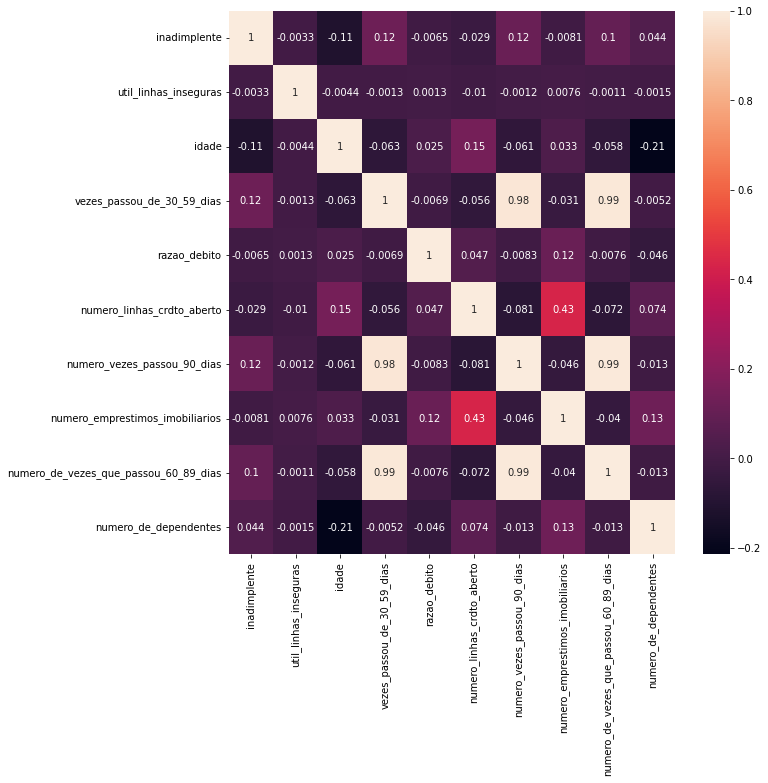

In [54]:
#Correlação entre as variáveis independentes. 
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(), annot=True)
plt.show()

###Balanceamento da base

In [55]:
#Reduzir as observações de adimplentes de forma aleatória
df2_class_0 = data2[data2['inadimplente'] == 0]
df2_class_1 = data2[data2['inadimplente'] == 1]
df2_class_0_under = df2_class_0.sample(7199)
df2_test_under = pd.concat([df2_class_0_under, df2_class_1], axis=0)

In [56]:
df2_test_under.shape

(14530, 10)

In [57]:
from sklearn.preprocessing import MinMaxScaler
norm2 = MinMaxScaler()
dtnorm2 = norm2.fit_transform(df2_test_under)
datanorm2 = pd.DataFrame(dtnorm2, columns = df2_test_under.columns)

In [58]:
#Separação das variáveis explicativas e resposta
y2 = datanorm2['inadimplente']
x2 = datanorm2.drop(columns=['inadimplente'],axis=1)

In [59]:
scores2 = SelectKBest(score_func=f_classif, k="all")
b = scores2.fit_transform(x2,y2)
sco2 = pd.DataFrame(columns = ['var', 'score', 'porcentagem'], index=range(9))
for i in range(9):
  sco2.iloc[i] = [scores2.feature_names_in_[i],scores2.scores_[i], 
                  (scores2.scores_[i]/sum(scores2.scores_))*100]
sco2.sort_values(by = 'score', ascending = False)

,var,score,porcentagem
1,idade,885.926821,57.647511
2,vezes_passou_de_30_59_dias,201.370629,13.103244
5,numero_vezes_passou_90_dias,173.072379,11.261869
7,numero_de_vezes_que_passou_60_89_dias,130.398342,8.485057
8,numero_de_dependentes,79.958843,5.202945
4,numero_linhas_crdto_aberto,59.827746,3.893008
6,numero_emprestimos_imobiliarios,3.158932,0.205553
3,razao_debito,1.969898,0.128182
0,util_linhas_inseguras,1.116196,0.072631


###Modelo

####Testagem de hiperparâmetros do modelo2 com RandomForest com todas as variáveis

In [60]:
#Testagem de hiperparâmetros do modelo
min_samples_split = [13,15,17,19,21,23,25,27,29,31]
max_depth = [2,3,5,7,9,11,13,15,17]
min_samples_leaf = [2,3,4,5,7,9]
valores = {'min_samples_split':min_samples_split, 
           'max_depth':max_depth, 
           'min_samples_leaf':min_samples_leaf}

modelo2 = RandomForestClassifier(n_estimators=50,
                                 n_jobs=-1)

search = RandomizedSearchCV(estimator=modelo2,
                            param_distributions=valores,
                            cv=kfold,
                            n_iter=50,
                            n_jobs=-1)
search.fit(x2,y2)
print(search.best_score_,
      search.best_estimator_.min_samples_split,
      search.best_estimator_.max_depth, 
      search.best_estimator_.min_samples_leaf)

0.7884377150722642 19 13 5


####Testagem de hiperparâmetros do modelo2 com AdaBoost com todas as variáveis

In [61]:
#Testagem de hiperparâmetros do modelo
n_estimators = [50,100,200]
learning_rate = [0.1,0.2,0.3,0.5,0.7,0.9]
valores = {'n_estimators':n_estimators,
           'learning_rate':learning_rate}

modelo2_ada = AdaBoostClassifier()

search = RandomizedSearchCV(estimator=modelo2_ada,
                            param_distributions=valores,
                            cv=kfold,
                            n_iter=min(len(n_estimators)*len(learning_rate),50),
                            n_jobs=-1)
search.fit(x2,y2)
print(search.best_score_,
      search.best_estimator_.n_estimators,
      search.best_estimator_.learning_rate)

0.7783207157604954 200 0.5


O melhor modelo no caso em que excluímos a coluna salario_mensal foi o RandomForest, atingindo a acurácia de 0.78843, com os parâmetros min_samples_split=19, max_depth=13 e min_samples_leaf=5.

##Análise 3: Substituição dos dados ausentes na coluna salario_mensal por sua mediana

In [62]:
data3 = data.copy()

###Preencher dados faltantes da coluna salario pela mediana

In [63]:
data3.salario_mensal = data3.salario_mensal.fillna(data3.salario_mensal.median())

In [64]:
data3[data3.idade < 18]

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [65]:
data3.drop(index = 65695, inplace = True)

In [66]:
data3.shape

(109999, 11)

In [67]:
#Verificar se a base é balanceada
data3.inadimplente.value_counts()

0    102668
1      7331
Name: inadimplente, dtype: int64

####Correlação

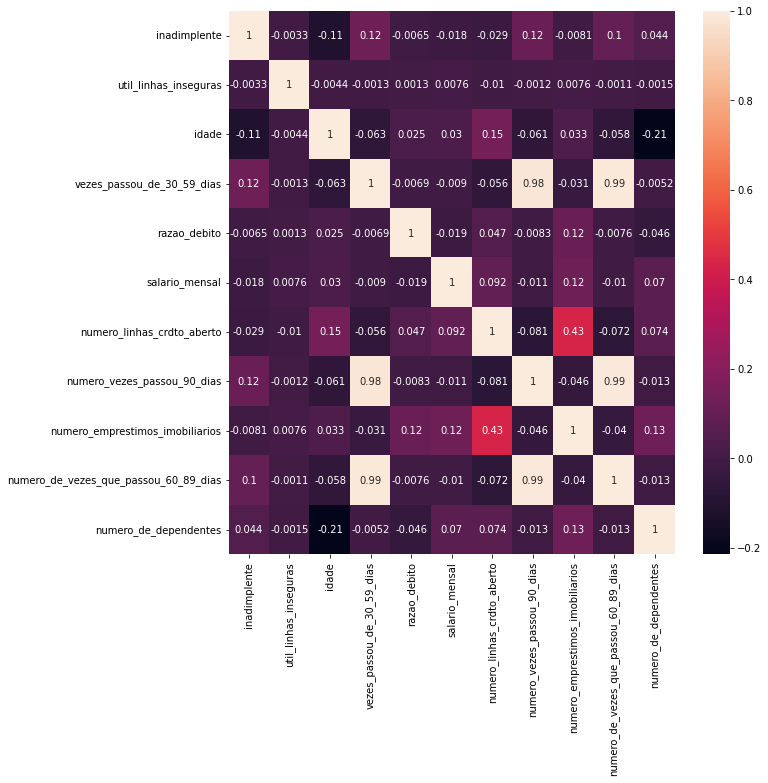

In [68]:
#Correlação entre as variáveis independentes. 
plt.figure(figsize=(10,10))
sns.heatmap(data3.corr(), annot=True)
plt.show()

###Balanceamento da base

In [69]:
#Reduzir as observações de adimplentes de forma aleatória
df3_class_0 = data3[data3['inadimplente'] == 0]
df3_class_1 = data3[data3['inadimplente'] == 1]
df3_class_0_under = df3_class_0.sample(7331)
df3_test_under = pd.concat([df3_class_0_under, df3_class_1], axis=0)

In [70]:
df3_test_under.shape

(14662, 11)

In [71]:
from sklearn.preprocessing import MinMaxScaler
norm3 = MinMaxScaler()
dtnorm3 = norm3.fit_transform(df3_test_under)
datanorm3 = pd.DataFrame(dtnorm3, columns = df3_test_under.columns)

In [72]:
#Separação das variáveis explicativas e resposta
y3 = datanorm3['inadimplente']
x3 = datanorm3.drop(columns=['inadimplente'],axis=1)

In [73]:
scores3 = SelectKBest(score_func=f_classif, k="all")
c = scores3.fit_transform(x3,y3)
sco3 = pd.DataFrame(columns = ['var', 'score', 'porcentagem'], index=range(10))
for i in range(10):
  sco3.iloc[i] = [scores3.feature_names_in_[i],scores3.scores_[i], 
                  (scores3.scores_[i]/sum(scores3.scores_))*100]
sco3.sort_values(by = 'score', ascending = False)

,var,score,porcentagem
1,idade,857.031394,54.214657
2,vezes_passou_de_30_59_dias,201.739193,12.761751
6,numero_vezes_passou_90_dias,172.281328,10.898286
8,numero_de_vezes_que_passou_60_89_dias,129.637925,8.200721
9,numero_de_dependentes,118.405389,7.490166
4,salario_mensal,53.956896,3.413241
5,numero_linhas_crdto_aberto,42.063446,2.660877
7,numero_emprestimos_imobiliarios,2.88928,0.182772
3,razao_debito,2.320024,0.146762
0,util_linhas_inseguras,0.486377,0.030768


###Modelo

####Testagem de hiperparâmetros do modelo3 com RandomForest com todas as variáveis

In [74]:
#Testagem de hiperparâmetros do modelo
min_samples_split = [2,3,5,7,9,11,13,15,17]
max_depth = [2,3,5,7,9,11,13,15,17]
min_samples_leaf = [2,3,4,5,7,9]
valores = {'min_samples_split':min_samples_split,
           'max_depth':max_depth,
           'min_samples_leaf':min_samples_leaf}

modelo3 = RandomForestClassifier(n_estimators=50,
                                 n_jobs=-1)

search = RandomizedSearchCV(estimator=modelo3,
                            param_distributions=valores,
                            cv=kfold, n_iter=50,
                            n_jobs=-1)
search.fit(x3,y3)
print(search.best_score_,
      search.best_estimator_.min_samples_split,
      search.best_estimator_.max_depth,
      search.best_estimator_.min_samples_leaf)

0.789182418255082 15 13 3


####Testagem de hiperparâmetros do modelo3 com AdaBoost com todas as variáveis

In [75]:
#Testagem de hiperparâmetros do modelo
n_estimators = [50,100,200]
learning_rate = [0.1,0.2,0.3,0.5,0.7,0.9]
valores = {'n_estimators':n_estimators,
           'learning_rate':learning_rate}

modelo3_ada = AdaBoostClassifier()

search = RandomizedSearchCV(estimator=modelo3_ada,
                            param_distributions=valores,
                            cv=kfold,
                            n_iter=min(len(n_estimators)*len(learning_rate),50),
                            n_jobs=-1)
search.fit(x3,y3)
print(search.best_score_,
      search.best_estimator_.n_estimators,
      search.best_estimator_.learning_rate)

0.7803838942382607 50 0.5


O melhor modelo no caso em que substituimos os valores faltantes da coluna salario_mensal foi o RandomForest, atingindo a acurácia de 0.78918, com os parâmetros min_samples_split=15, max_depth=13 e min_samples_leaf=3, sendo também o melhor modelo encontrado.

##Predição na base de teste

###Verificação da base de dados de teste

In [95]:
#Importação dos dados de teste
teste = pd.read_csv('teste.csv')
teste.shape

(40000, 10)

In [96]:
teste.head(3)

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0


In [97]:
teste.columns

Index(['util_linhas_inseguras', 'idade', 'vezes_passou_de_30_59_dias',
       'razao_debito', 'salario_mensal', 'numero_linhas_crdto_aberto',
       'numero_vezes_passou_90_dias', 'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

In [98]:
#Verificação dos tipos dos dados
teste.dtypes

util_linhas_inseguras                    float64
idade                                      int64
vezes_passou_de_30_59_dias                 int64
razao_debito                             float64
salario_mensal                           float64
numero_linhas_crdto_aberto                 int64
numero_vezes_passou_90_dias                int64
numero_emprestimos_imobiliarios            int64
numero_de_vezes_que_passou_60_89_dias      int64
numero_de_dependentes                    float64
dtype: object

In [99]:
#Verificar se há dados faltantes
for col in teste.columns:
  print(col, teste[col].isnull().sum())

util_linhas_inseguras 0
idade 0
vezes_passou_de_30_59_dias 0
razao_debito 0
salario_mensal 7968
numero_linhas_crdto_aberto 0
numero_vezes_passou_90_dias 0
numero_emprestimos_imobiliarios 0
numero_de_vezes_que_passou_60_89_dias 0
numero_de_dependentes 1046


###Substituição dos dados faltantes nas colunas numero_de_dependentes e salario_mensal, conforme executado no modelo selecionado na base de treino.

In [100]:
teste.salario_mensal = teste.salario_mensal.fillna(
                                          teste.salario_mensal.median())
teste.numero_de_dependentes = teste.numero_de_dependentes.fillna(
                                          teste.numero_de_dependentes.median())

In [101]:
#Verificar se há dados faltantes
for col in teste.columns:
  print(col, teste[col].isnull().sum())

util_linhas_inseguras 0
idade 0
vezes_passou_de_30_59_dias 0
razao_debito 0
salario_mensal 0
numero_linhas_crdto_aberto 0
numero_vezes_passou_90_dias 0
numero_emprestimos_imobiliarios 0
numero_de_vezes_que_passou_60_89_dias 0
numero_de_dependentes 0


In [102]:
#Verificar os resumos das variáveis
for i in teste.columns:
  print(teste[i].describe())

count    40000.000000
mean         6.374199
std        242.617247
min          0.000000
25%          0.029362
50%          0.149491
75%          0.549762
max      22000.000000
Name: util_linhas_inseguras, dtype: float64
count    40000.000000
mean        52.404025
std         14.781468
min         21.000000
25%         41.000000
50%         52.000000
75%         63.000000
max        109.000000
Name: idade, dtype: float64
count    40000.000000
mean         0.412725
std          4.057899
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: vezes_passou_de_30_59_dias, dtype: float64
count     40000.000000
mean        348.004166
std        1934.436246
min           0.000000
25%           0.175360
50%           0.366172
75%           0.872253
max      307001.000000
Name: razao_debito, dtype: float64
count    4.000000e+04
mean     6.491462e+03
std      1.507606e+04
min      0.000000e+00
25%      3.901000e+03
50%      5.409500e+03


####Gráficos

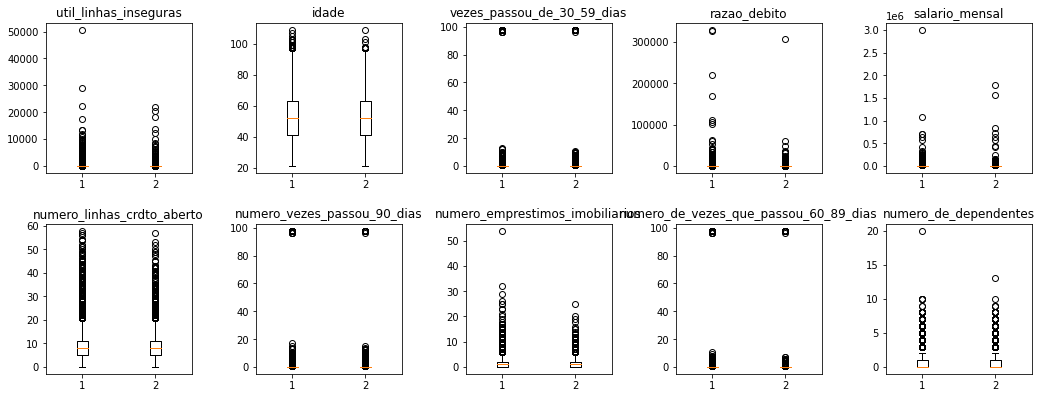

In [103]:
#Boxplots
fig, axs = plt.subplots(2,5,figsize= (15,6))
fig.tight_layout(pad=3.0)
colunas = list(data3.columns)
colunas = colunas[1:]
for i in range(2):
  for j in range(5):
    axs[i][j].boxplot(x = [data3[colunas[i*5+j]], teste[colunas[i*5+j]]])
    axs[i][j].set_title(colunas[i*5+j])

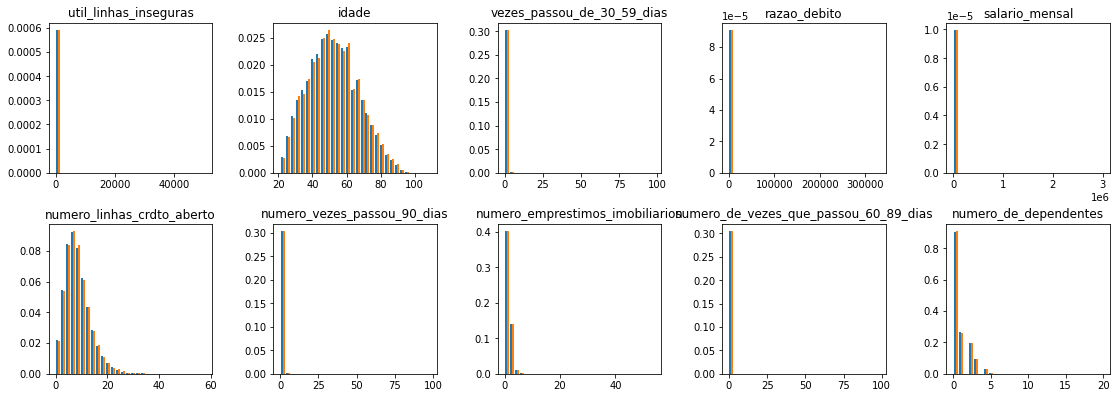

In [104]:
#Histogramas
fig, axs = plt.subplots(2,5,figsize= (16,6))
fig.tight_layout(pad=3.0)
colunas = list(data3.columns)
colunas = colunas[1:]
for i in range(2):
  for j in range(5):
    axs[i][j].hist(x = [data3[colunas[i*5+j]], teste[colunas[i*5+j]]], 
                   bins = 30, density=True)
    axs[i][j].set_title(colunas[i*5+j])

####Normalização

In [105]:
from sklearn.preprocessing import MinMaxScaler
normteste = MinMaxScaler()
dtnormteste = normteste.fit_transform(teste)
datanormteste = pd.DataFrame(dtnormteste, columns = teste.columns)

###Modelo e predição

In [106]:
modelo = RandomForestClassifier(n_estimators=50, 
                                n_jobs=-1, 
                                min_samples_split = 15,
                                max_depth = 13,
                                min_samples_leaf = 3)
modelo.fit(x3,y3)

RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=15,
                       n_estimators=50, n_jobs=-1)

In [107]:
predicao = modelo.predict(datanormteste)
predicao

array([0., 0., 0., ..., 1., 1., 1.])

In [108]:
teste['inadimplente'] = predicao

In [109]:
teste.head(5)

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0,1.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0,0.0


In [111]:
teste.to_csv('testecomprevisoes.csv')